# Ex06 - Primeiros passos para a Transformada de Fourier

### Parte 1 - Gerando ondas senoidas 1D e 2D

Melhore o notebook sobre ondas senoidais ([link](08 Ondas senoidais.ipynb)), gerando outras senoides 2D e tentando interpretar o significado dos períodos $T_r$, $T_c$ e $T$, bem como das ferquências normalizadas $u$ e $v$. Comece tentando gerar senoides 2D, onde $T_r$ ou $T_c$ é nulo. 

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft2
import sys,os
ia898path = os.path.abspath('../../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

""
""

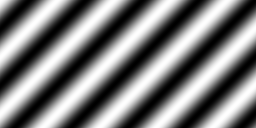

In [61]:
H = 128
W = 256
s = (H,W)
T = 40
theta = 45 * np.pi/180
f = ia.cos(s, T, theta, 0)
ia.adshow(ia.normalize(f, [0,255]))

**OBS: estou usando a função adshow no lugar da implot pois percebi um efeito quadriculado na visualização (vejam abaixo).**

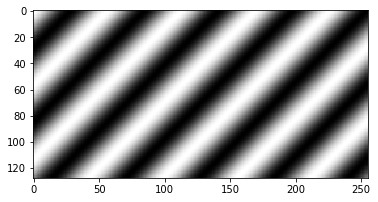

In [67]:
plt.imshow(f, cmap='gray')

### Parte 2 - Calculando a translação periódica

A próxima atividade consiste em entender as diferentes implementações da translação periódica. Procure comparar as 3 versões ([translação periódica](09 Translacao periodica.ipynb)). 

1. Primeiro, transforme a primeira implementação em uma função que recebe parâmetros para realizar a translação (rr, cc). 
2. Implemente a terceira forma indicada no link acima (usando slicing). 
3. Compare as 3 formas, em termos de resultado e de tempo. É provável que a última opção seja a mais eficiente de todas, pois somente utiliza fatiamento.

Um dos cuidados nas implementações é observar que os parâmetros da translação podem ser negativos ou ainda bem maiores que a largura ou altura da imagem.



### Parte 3 - Calculando a Transformada de Fourier de uma onda senoidal

Antes de continuar, leia sobre a Transformada Discreta de Fourier (DFT) e sobre a Transformada Rápida de Fourier (FFT). Além dos slides colocados no Google Calssroom, dê uma olhada em alguns links interessantes:

- [demo](http://bigwww.epfl.ch/demo/ip/demos/FFT/)
- [explicação intuitiva](https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/)

No exemplo abaixo, a partir da onda senoidal bidimensional gerada na parte 1, calculamos a Transformada de Fourier usando a função *fft2* do numpy. Para a visualização, é necessário fazer a translação periódica, para colocar a origem do espectro (0,0) no centro da imagem. Também é preciso usar o valor da magnitude do espectro resultante, já que o resultado da transformação é uma matriz complexa. E por fim, costumamos visualizar o log do resultado.

""
"[0, 255]"

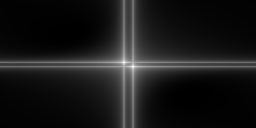

In [65]:
faux = f
F = fft2(faux)
H,W = faux.shape
ia.adshow(ia.normalize(np.log(np.abs(ia.ptrans(F,(H//2,W//2))+1))), [0,255])

1. Experimente visualizar a Transformada de Fourier de diversas formas: sem fazer a translação periódica, sem calcular o logaritmo. Observe as diferenças e comente.
2. Crie uma função auxiliar de visualização da Transformada de Fourier, assim como fizeram para visualização de múltiplas imagens, pois ela será bastante utilizada neste e nos próximos notebooks.
3. Explique porque o espectro de Fourier não aparece como apenas 2 pontos (senoide). Modifique a senoide *f* para obter apenas 2 pontos na Transformada de Fourier. (DICA: a imagem *f* que estamos buscando ainda será uma senoide bidimensional, porém com alguma propriedade que evite o efeito observado.) Uma outra maneira de tentar entender o que está causando o problema é criar o espectro que se deseja de forma sintética (uma imagem com 2 pontos equidistantes do centro e diametralmente opostos - dizemos que é um par de pontos complexos conjugados) e fazer a transformada inversa de Fourier (ifft2 do numpy) para obter a imagem da senoide buscada.